# basic

In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('BDAS_chua497').getOrCreate()

In [2]:
data = spark.read.csv("who-revised.csv",inferSchema=True,header=True)

# 2.3

In [3]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Life_expectancy: string (nullable = true)
 |-- Adult_Mortality: string (nullable = true)
 |-- infant_deaths: integer (nullable = true)
 |-- Alcohol: string (nullable = true)
 |-- Hepatitis_B: string (nullable = true)
 |-- Measles: integer (nullable = true)
 |-- under_five_deaths: integer (nullable = true)
 |-- Polio: string (nullable = true)
 |-- Total_expenditure: string (nullable = true)
 |-- Diphtheria: string (nullable = true)
 |-- HIV_AIDS: double (nullable = true)
 |-- GDP: string (nullable = true)
 |-- Population: string (nullable = true)
 |-- thinness__1_19_years: string (nullable = true)
 |-- thinness_5_9_years: string (nullable = true)
 |-- Income_composition_of_resources: string (nullable = true)
 |-- Schooling: string (nullable = true)



In [4]:
data.head()

Row(_c0=1, Country='Afghanistan', Year=2015, Life_expectancy='65', Adult_Mortality='263', infant_deaths=62, Alcohol='0.01', Hepatitis_B='65', Measles=1154, under_five_deaths=83, Polio='6', Total_expenditure='8.16', Diphtheria='65', HIV_AIDS=0.1, GDP='574.1841143', Population='33736494', thinness__1_19_years='17.2', thinness_5_9_years='17.3', Income_composition_of_resources='0.479', Schooling='10.1')

root
 |-- _c0: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Year: double (nullable = true)
 |-- Life_expectancy: double (nullable = true)
 |-- Adult_Mortality: double (nullable = true)
 |-- infant_deaths: double (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- Hepatitis_B: double (nullable = true)
 |-- Measles: double (nullable = true)
 |-- under_five_deaths: double (nullable = true)
 |-- Polio: double (nullable = true)
 |-- Total_expenditure: double (nullable = true)
 |-- Diphtheria: double (nullable = true)
 |-- HIV_AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |-- thinness__1_19_years: double (nullable = true)
 |-- thinness_5_9_years: double (nullable = true)
 |-- Income_composition_of_resources: double (nullable = true)
 |-- Schooling: double (nullable = true)



<IPython.core.display.Javascript object>


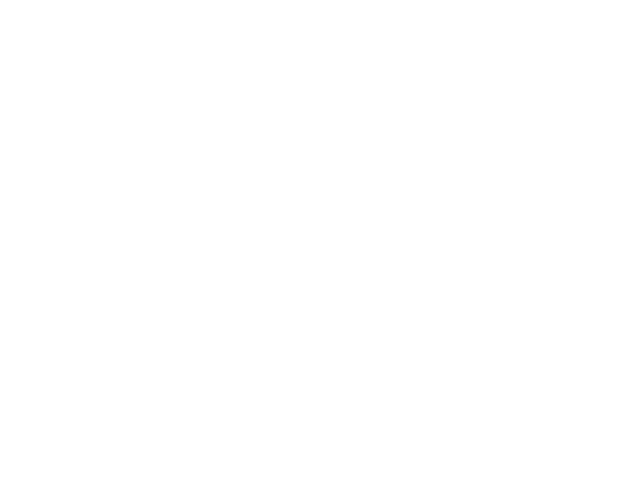

In [5]:
from matplotlib import pyplot as plt
%matplotlib notebook
from pyspark.sql.types import DoubleType
#data.columns[3]
#data.select(data.columns[3]).show()
for i in range(2, 20):
    data = data.withColumn(data.columns[i], data[data.columns[i]].cast(DoubleType()))

data.printSchema()

y = data.select(data.columns[3]).collect()
for i in range(2, 20):
    plt.subplot(6,  3,  i - 1)  
    x = data.select(data.columns[i]).collect()
    plt.scatter(x, y)
    plt.title(data.columns[i])
plt.show()

# 2.4

In [6]:
data.count()
print("Missing value:")
for i in range(1, 20):
    row = "%s is null" %(data.columns[i])
    print("%s : %d/%d" %(data.columns[i], data.where(row).count(), data.count()))


Missing value:
Country : 0/2936
Year : 0/2936
Life_expectancy : 8/2936
Adult_Mortality : 8/2936
infant_deaths : 0/2936
Alcohol : 194/2936
Hepatitis_B : 553/2936
Measles : 0/2936
under_five_deaths : 0/2936
Polio : 19/2936
Total_expenditure : 226/2936
Diphtheria : 19/2936
HIV_AIDS : 0/2936
GDP : 94/2936
Population : 4/2936
thinness__1_19_years : 34/2936
thinness_5_9_years : 34/2936
Income_composition_of_resources : 165/2936
Schooling : 161/2936


<IPython.core.display.Javascript object>


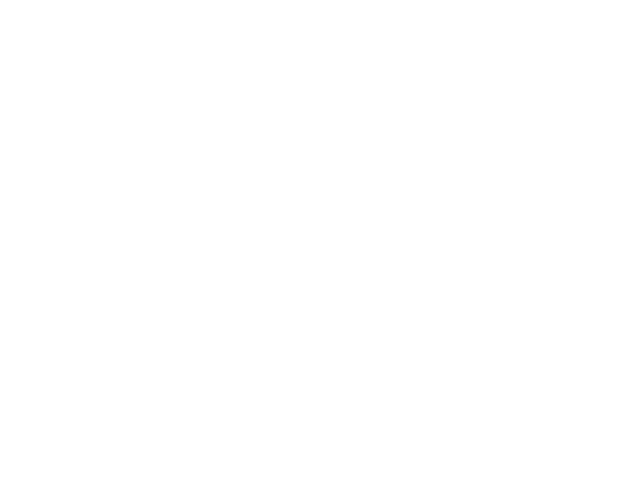

In [7]:
x = data.select(data.columns[0]).collect()
%matplotlib notebook
for i in range(3, 20):
    plt.subplot(6,  3,  i - 2)  
    y = data.select(data.columns[i]).collect()
    plt.scatter(x, y, color='green', marker='o', edgecolor='black', alpha=0.5)
    plt.title(data.columns[i])
plt.show()


# 3.3

<IPython.core.display.Javascript object>


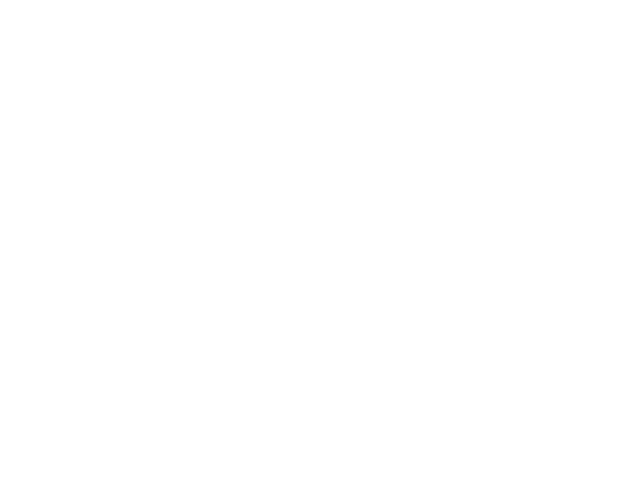

In [8]:
data_claen = data.where("Hepatitis_B > 10 and Polio > 10 and Diphtheria > 10 and Income_composition_of_resources > 0.1")
x = data_claen.select(data_claen.columns[0]).collect()
%matplotlib notebook
for i in range(3, 20):
    plt.subplot(6,  3,  i - 2)  
    y = data_claen.select(data_claen.columns[i]).collect()
    plt.scatter(x, y, color='green', marker='o', edgecolor='black', alpha=0.5)
    plt.title(data_claen.columns[i])
plt.show()

In [9]:
print(data_claen.count())
data_claen2 = data_claen.na.drop()
print(data_claen2.count())

1934
1746


# 3.4

In [10]:
construct_text = data.withColumn("GDP_Population", data["GDP"] + data["Population"])
construct_text.printSchema()
construct_text.select("GDP", "Population", "GDP_Population").show()

root
 |-- _c0: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Year: double (nullable = true)
 |-- Life_expectancy: double (nullable = true)
 |-- Adult_Mortality: double (nullable = true)
 |-- infant_deaths: double (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- Hepatitis_B: double (nullable = true)
 |-- Measles: double (nullable = true)
 |-- under_five_deaths: double (nullable = true)
 |-- Polio: double (nullable = true)
 |-- Total_expenditure: double (nullable = true)
 |-- Diphtheria: double (nullable = true)
 |-- HIV_AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |-- thinness__1_19_years: double (nullable = true)
 |-- thinness_5_9_years: double (nullable = true)
 |-- Income_composition_of_resources: double (nullable = true)
 |-- Schooling: double (nullable = true)
 |-- GDP_Population: double (nullable = true)

+-----------+-----------+------------------+
|        GDP| Population|    GDP

# 3.5

In [11]:
Integrate_text = data.unionAll(data)
Integrate_text.printSchema()
print(data.count())
print(Integrate_text.count())

root
 |-- _c0: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Year: double (nullable = true)
 |-- Life_expectancy: double (nullable = true)
 |-- Adult_Mortality: double (nullable = true)
 |-- infant_deaths: double (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- Hepatitis_B: double (nullable = true)
 |-- Measles: double (nullable = true)
 |-- under_five_deaths: double (nullable = true)
 |-- Polio: double (nullable = true)
 |-- Total_expenditure: double (nullable = true)
 |-- Diphtheria: double (nullable = true)
 |-- HIV_AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |-- thinness__1_19_years: double (nullable = true)
 |-- thinness_5_9_years: double (nullable = true)
 |-- Income_composition_of_resources: double (nullable = true)
 |-- Schooling: double (nullable = true)

2936
5872


# 4.1

In [12]:
data_reduce = data_claen2.drop("_c0", "Country", "Population")
data_reduce.printSchema()


root
 |-- Year: double (nullable = true)
 |-- Life_expectancy: double (nullable = true)
 |-- Adult_Mortality: double (nullable = true)
 |-- infant_deaths: double (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- Hepatitis_B: double (nullable = true)
 |-- Measles: double (nullable = true)
 |-- under_five_deaths: double (nullable = true)
 |-- Polio: double (nullable = true)
 |-- Total_expenditure: double (nullable = true)
 |-- Diphtheria: double (nullable = true)
 |-- HIV_AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- thinness__1_19_years: double (nullable = true)
 |-- thinness_5_9_years: double (nullable = true)
 |-- Income_composition_of_resources: double (nullable = true)
 |-- Schooling: double (nullable = true)



# 4.2

In [13]:
print(data_reduce.select("Schooling").rdd.max()[0])
print(data_reduce.select("Schooling").rdd.min()[0])
print(data_reduce.select("GDP").rdd.max()[0])
print(data_reduce.select("GDP").rdd.min()[0])

20.7
4.2
111968.3495
221.0963747


In [14]:
import math
from pyspark.sql.functions import col
from pyspark.sql.types import FloatType
from pyspark.sql import functions as F

print(data_reduce.head())
for i in range(0, 17):
    if(i == 1):
        continue
    data_reduce = data_reduce.withColumn(data_reduce.columns[i], F.log10(col(data_reduce.columns[i]) + 1))

print(data_reduce.head())



Row(Year=2014.0, Life_expectancy=59.9, Adult_Mortality=271.0, infant_deaths=64.0, Alcohol=0.01, Hepatitis_B=62.0, Measles=492.0, under_five_deaths=86.0, Polio=58.0, Total_expenditure=8.18, Diphtheria=62.0, HIV_AIDS=0.1, GDP=583.6561928, thinness__1_19_years=17.5, thinness_5_9_years=17.5, Income_composition_of_resources=0.476, Schooling=10.0)
Row(Year=3.3042750504771283, Life_expectancy=59.9, Adult_Mortality=2.4345689040341987, infant_deaths=1.8129133566428555, Alcohol=0.004321373782642578, Hepatitis_B=1.7993405494535817, Measles=2.69284691927723, under_five_deaths=1.9395192526186185, Polio=1.7708520116421442, Total_expenditure=0.9628426812012424, Diphtheria=1.7993405494535817, HIV_AIDS=0.04139268515822508, GDP=2.7669005541793874, thinness__1_19_years=1.2671717284030137, thinness_5_9_years=1.2671717284030137, Income_composition_of_resources=0.16908635748702275, Schooling=1.0413926851582251)


<IPython.core.display.Javascript object>


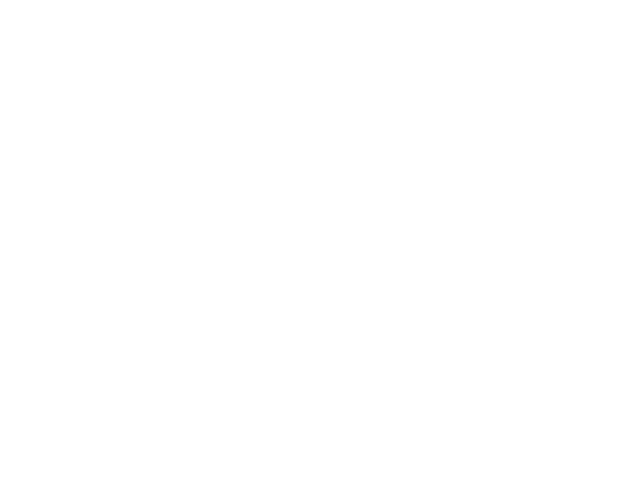

In [15]:
x = [i for i in range(0, data_reduce.count())]
%matplotlib notebook
for i in range(0, 17):
    plt.subplot(6,  3,  i + 1)  
    y = data_reduce.select(data_reduce.columns[i]).collect()
    plt.scatter(x, y, color='green', marker='o', edgecolor='black', alpha=0.5)
    plt.title(data_reduce.columns[i])
plt.show()

# 6.3

In [16]:
data = data_reduce
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
vecAssembler = VectorAssembler(inputCols=["Year", "Adult_Mortality", "infant_deaths"
                                          , "Alcohol", "Hepatitis_B", "Measles", "under_five_deaths"
                                          , "Polio", "Total_expenditure", "Diphtheria", "HIV_AIDS"
                                          , "GDP", "thinness__1_19_years", "thinness_5_9_years"
                                          , "Income_composition_of_resources", "Schooling"], outputCol="features")

final_data = vecAssembler.transform(data_reduce).select("features", "Life_expectancy")

final_data.show()

+--------------------+---------------+
|            features|Life_expectancy|
+--------------------+---------------+
|[3.30427505047712...|           59.9|
|[3.30405946621759...|           59.9|
|[3.30384377488865...|           59.5|
|[3.30362797638389...|           59.2|
|[3.30341207059674...|           58.8|
|[3.30319605742048...|           58.6|
|[3.30297993674824...|           58.1|
|[3.30276370847298...|           57.5|
|[3.30254737248748...|           57.3|
|[3.30233092868439...|           57.3|
|[3.30189771719520...|           56.7|
|[3.30168094929357...|           56.2|
|[3.30449052777348...|           77.8|
|[3.30427505047712...|           77.5|
|[3.30405946621759...|           77.2|
|[3.30384377488865...|           76.9|
|[3.30362797638389...|           76.6|
|[3.30341207059674...|           76.2|
|[3.30319605742048...|           76.1|
|[3.30297993674824...|           75.3|
+--------------------+---------------+
only showing top 20 rows



In [17]:
train_data,test_data = final_data.randomSplit([0.7,0.3])
train_data.describe().show()
test_data.describe().show()

+-------+-----------------+
|summary|  Life_expectancy|
+-------+-----------------+
|  count|             1274|
|   mean|70.71059654631081|
| stddev|7.828681478347078|
|    min|             44.3|
|    max|             89.0|
+-------+-----------------+

+-------+-----------------+
|summary|  Life_expectancy|
+-------+-----------------+
|  count|              472|
|   mean|70.38347457627118|
| stddev|8.794911564669091|
|    min|             44.0|
|    max|             89.0|
+-------+-----------------+



In [18]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(labelCol="Life_expectancy")
lrModel = lr.fit(train_data)
data.printSchema()
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))


root
 |-- Year: double (nullable = true)
 |-- Life_expectancy: double (nullable = true)
 |-- Adult_Mortality: double (nullable = true)
 |-- infant_deaths: double (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- Hepatitis_B: double (nullable = true)
 |-- Measles: double (nullable = true)
 |-- under_five_deaths: double (nullable = true)
 |-- Polio: double (nullable = true)
 |-- Total_expenditure: double (nullable = true)
 |-- Diphtheria: double (nullable = true)
 |-- HIV_AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- thinness__1_19_years: double (nullable = true)
 |-- thinness_5_9_years: double (nullable = true)
 |-- Income_composition_of_resources: double (nullable = true)
 |-- Schooling: double (nullable = true)

Coefficients: [293.61655943714,-1.2414454530078547,0.6965078465698196,-0.36519727197590407,-2.910574451977379,-0.008253900673226004,-0.8870188186296055,-1.528852531666383,3.0197054089119213,11.316642739516295,-8.7557369111314,0.717813895877

In [19]:
print( "Intercept: %f" %(lrModel.intercept))
print("Coefficients:")
for i in range(0, 16):
    j = i
    if(i >= 2):
        j = i+1
    print("%s: %f" %(data.columns[j], lrModel.coefficients[i]))

Intercept: -929.225169
Coefficients:
Year: 293.616559
Life_expectancy: -1.241445
infant_deaths: 0.696508
Alcohol: -0.365197
Hepatitis_B: -2.910574
Measles: -0.008254
under_five_deaths: -0.887019
Polio: -1.528853
Total_expenditure: 3.019705
Diphtheria: 11.316643
HIV_AIDS: -8.755737
GDP: 0.717814
thinness__1_19_years: 1.208229
thinness_5_9_years: -3.384941
Income_composition_of_resources: 133.641299
Schooling: -10.994240


In [20]:
test_results = lrModel.evaluate(test_data)
test_results.residuals.show(10)
print("RSME: {}".format(test_results.rootMeanSquaredError))

+--------------------+
|           residuals|
+--------------------+
| -2.8319105001920377|
| -0.1595276785795079|
|  0.8084006578348237|
|  1.4187435614863517|
|   2.920525711672923|
|   6.116455119741659|
|-0.43091055783345666|
|  0.9130329710743581|
|   6.264110909697024|
| 0.35472698695427596|
+--------------------+
only showing top 10 rows

RSME: 3.1313051886762033


In [21]:
print("R2: {}".format(test_results.r2))

R2: 0.8729692292752937


In [22]:
final_data.describe().show()

+-------+-----------------+
|summary|  Life_expectancy|
+-------+-----------------+
|  count|             1746|
|   mean|70.62216494845362|
| stddev| 8.09997956120717|
|    min|             44.0|
|    max|             89.0|
+-------+-----------------+



# 8.2

<IPython.core.display.Javascript object>


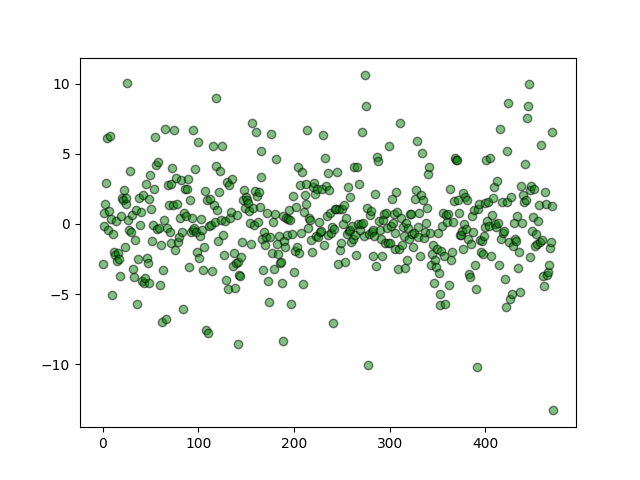

In [23]:
x = [i for i in range(0, test_data.count())]
y = test_results.residuals.collect()
%matplotlib notebook
plt.scatter(x, y, color='green', marker='o', edgecolor='black', alpha=0.5)
plt.show()

# 8.5

In [24]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import RegressionEvaluator
data = final_data
data.show(10)

+--------------------+---------------+
|            features|Life_expectancy|
+--------------------+---------------+
|[3.30427505047712...|           59.9|
|[3.30405946621759...|           59.9|
|[3.30384377488865...|           59.5|
|[3.30362797638389...|           59.2|
|[3.30341207059674...|           58.8|
|[3.30319605742048...|           58.6|
|[3.30297993674824...|           58.1|
|[3.30276370847298...|           57.5|
|[3.30254737248748...|           57.3|
|[3.30233092868439...|           57.3|
+--------------------+---------------+
only showing top 10 rows



In [25]:
(trainingData, testData) = data.randomSplit([0.7, 0.3])
trainingData.describe().show()
testData.describe().show()
rf = RandomForestRegressor(labelCol="Life_expectancy", featuresCol="features")

model_rf = rf.fit(trainingData)
prediction_rf = model_rf.transform(testData)



+-------+-----------------+
|summary|  Life_expectancy|
+-------+-----------------+
|  count|             1250|
|   mean|70.75496000000007|
| stddev| 8.09882387491701|
|    min|             44.0|
|    max|             89.0|
+-------+-----------------+

+-------+-----------------+
|summary|  Life_expectancy|
+-------+-----------------+
|  count|              496|
|   mean|70.28749999999995|
| stddev|8.101400614658674|
|    min|             44.3|
|    max|             89.0|
+-------+-----------------+



In [26]:
prediction_rf.show()

+--------------------+---------------+-----------------+
|            features|Life_expectancy|       prediction|
+--------------------+---------------+-----------------+
|[3.30124708863621...|           78.1|79.08097821250377|
|[3.30124708863621...|           76.6|77.45369660474958|
|[3.30124708863621...|           72.6| 73.9633162837827|
|[3.30124708863621...|           72.0|72.62873485164967|
|[3.30124708863621...|           79.4|80.89065899472905|
|[3.30124708863621...|           78.2|79.19454471289342|
|[3.30124708863621...|           72.9|72.52003674054274|
|[3.30124708863621...|           76.9|72.70827604962032|
|[3.30124708863621...|           72.0|71.51259228065271|
|[3.30124708863621...|           73.0|74.37316651502162|
|[3.30124708863621...|           78.0|73.66273490736299|
|[3.30124708863621...|           73.7|74.14179223441838|
|[3.30124708863621...|           72.8|71.87574927771658|
|[3.30124708863621...|           71.0|66.57479050270396|
|[3.30124708863621...|         

In [27]:
evaluator = RegressionEvaluator(labelCol="Life_expectancy", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(prediction_rf)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 2.30241


In [28]:
print(model_rf)

RandomForestRegressionModel (uid=rfr_eae8beefaeff) with 20 trees
